In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('../datasets/2-multiplegradesdataset.csv')

In [10]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [11]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [13]:
df.isnull().sum()

Study Hours           0
Sleep Hours           0
Attendance Rate       0
Social Media Hours    0
Exam Score            0
dtype: int64

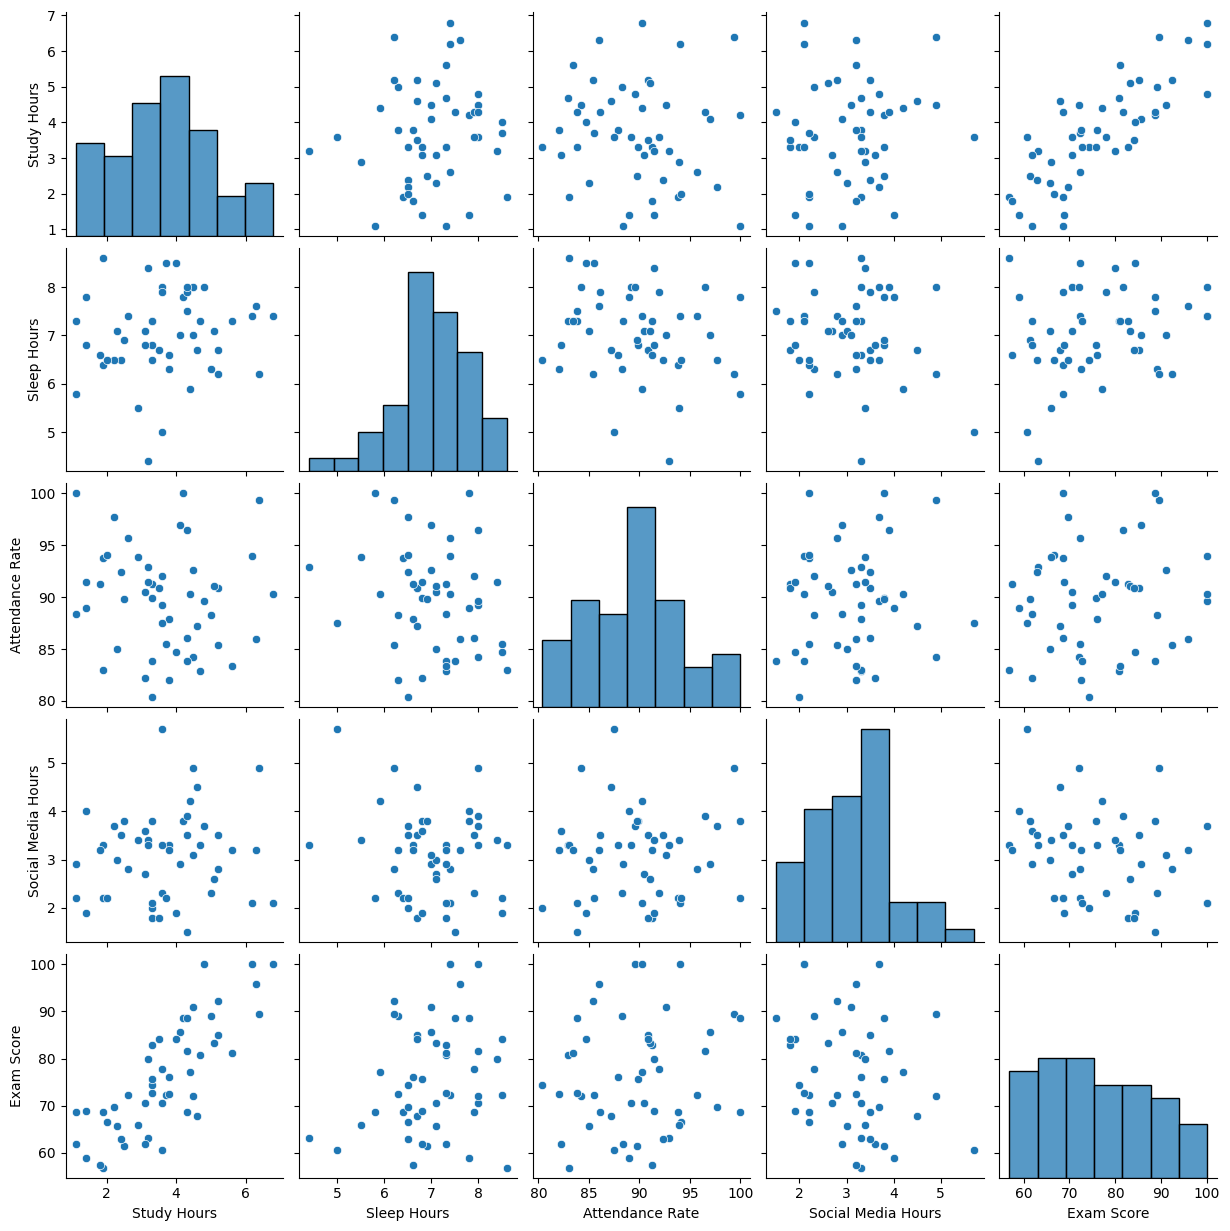

In [14]:
sns.pairplot(df)
plt.show()

In [15]:
df.corr()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


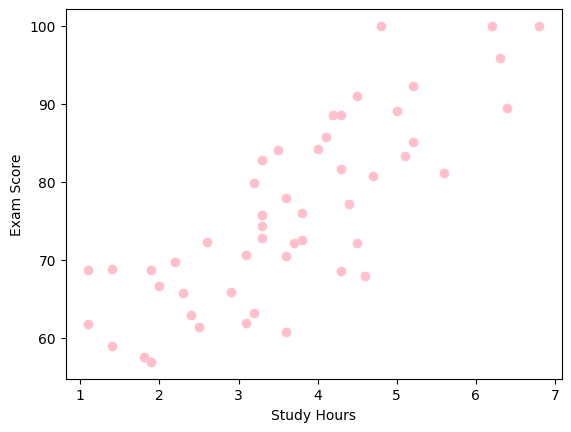

In [ ]:
plt.scatter(df["Study Hours"], df["Exam Score"], color='pink', label='Exam Score vs Sleep Hours')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.show()

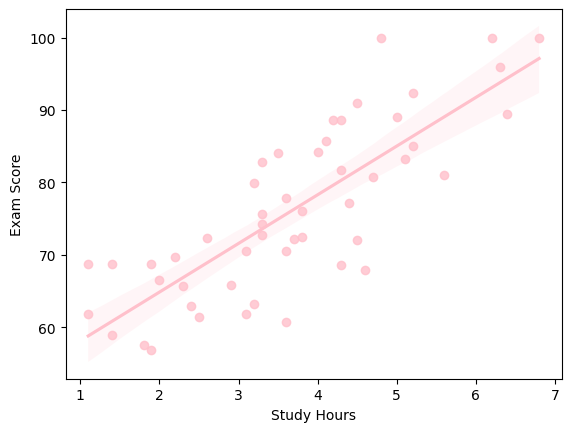

In [94]:
sns.regplot(x=df['Study Hours'],y=df['Exam Score'], color="pink")
plt.show()

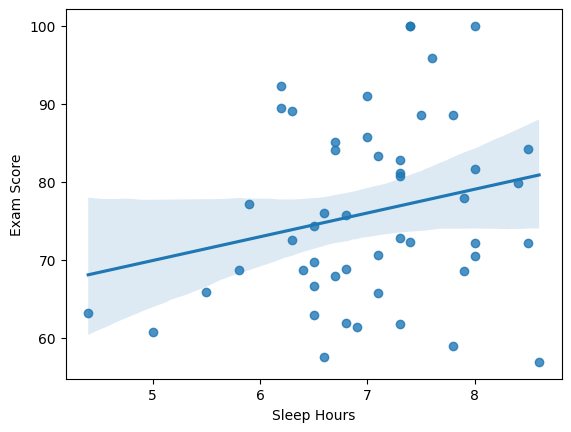

In [95]:
sns.regplot(x=df['Sleep Hours'],y=df['Exam Score'])
plt.show()

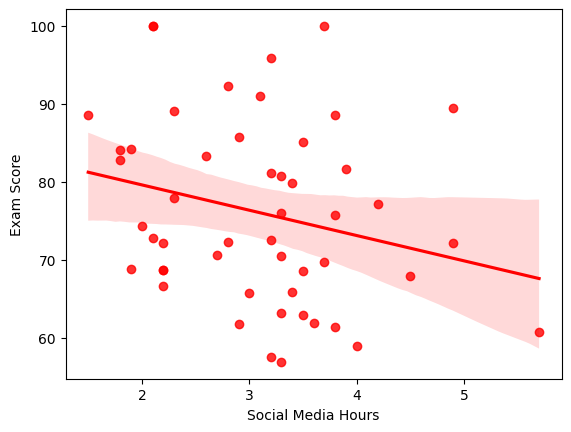

In [97]:
sns.regplot(x=df['Social Media Hours'],y=df['Exam Score'], color="red")
plt.show()

In [98]:
# independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

#X = df[["Study Hours", "Sleep Hours", "Attendance Rate", "Social Media Hours"]]
#y = df["Exam Score"]

In [99]:
y.head()


0    80.7
1    76.0
2    89.1
3    95.9
4    70.5
Name: Exam Score, dtype: float64

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [103]:
X_train[0]

array([0.76492234, 1.07637448, 0.00270413, 0.67593203])

In [104]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [105]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [106]:
# prediction
y_pred=regression.predict(X_test)

In [107]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("mse: ", mse)
print("mae: ", mae)
print("rmse: ", rmse)

mse:  14.600589378986278
mae:  3.2770264859627876
rmse:  3.821071757895457


In [108]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("r2 score: ", score)
#adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

r2 score:  0.9156707345772709
0.8735061018659063


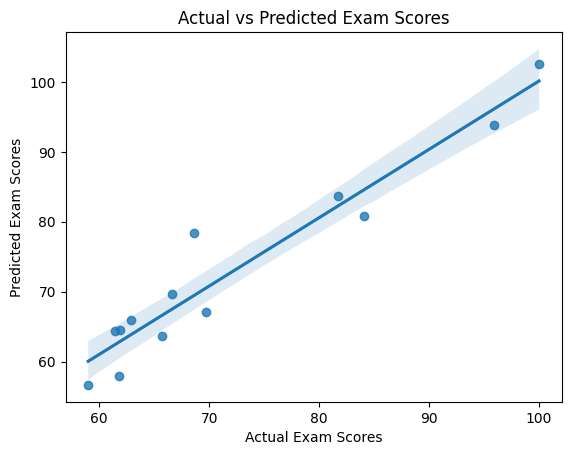

In [112]:
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores')
plt.show()

Residual = Gerçek Değer - Tahmin Edilen Değer

Pozitif residual → Model düşük tahmin etmiş

Negatif residual → Model yüksek tahmin etmiş

Sıfıra yakın → Model doğru tahmin etmiş

In [113]:
residuals=y_test-y_pred
print(residuals)

35    2.652956
37    3.894544
41   -1.930848
26    2.006006
38   -3.130796
43    3.335144
3     2.135550
33   -3.039535
30   -2.686757
36   -9.822961
14    2.321394
16   -3.040466
20   -2.604386
Name: Exam Score, dtype: float64


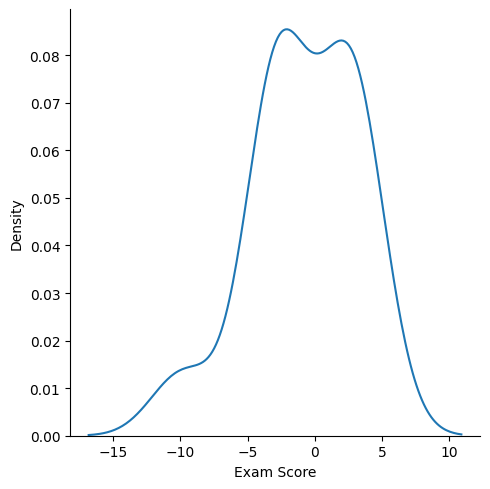

In [114]:
# if residuals are in normal distribution it seems good
sns.displot(residuals,kind='kde')
plt.show()

İyi İşaretler:
* Normal Dağılım Şekli: Çan eğrisi gibi görünüyor
* Sıfır Merkezli: Dağılımın merkezi 0'a yakın
* Simetrik: Sağ ve sol taraf dengeli

In [ ]:
# β₀ = intercept (y-kesimi, sabit terim)
regression.intercept_

np.float64(77.41081081081082)

In [117]:
# β₁, β₂, β₃, β₄ = coefficients (katsayılar)
regression.coef_

array([ 9.28014703,  1.78967062,  3.24340001, -4.08127695])

## Feature Importance & Coefficients Analysis

Katsayıları görselleştirerek hangi özelliğin exam score üzerinde ne kadar etkili olduğunu anlayabiliriz:

- **Pozitif katsayı**: O özellik arttıkça exam score artar
- **Negatif katsayı**: O özellik arttıkça exam score azalır  
- **Büyük mutlak değer**: O özellik daha etkili

In [118]:
# Feature names ve coefficients'ları birleştir
feature_names = ['Study Hours', 'Social Media Hours', 'Attendance Rate', 'Sleep Hours']
coefficients = regression.coef_

# DataFrame oluştur
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute_Coefficient': np.abs(coefficients)
}).sort_values('Absolute_Coefficient', ascending=False)

print("Feature Coefficients (En etkili olandan sıraya):")
print(coef_df)

Feature Coefficients (En etkili olandan sıraya):
              Feature  Coefficient  Absolute_Coefficient
0         Study Hours     9.280147              9.280147
3         Sleep Hours    -4.081277              4.081277
2     Attendance Rate     3.243400              3.243400
1  Social Media Hours     1.789671              1.789671


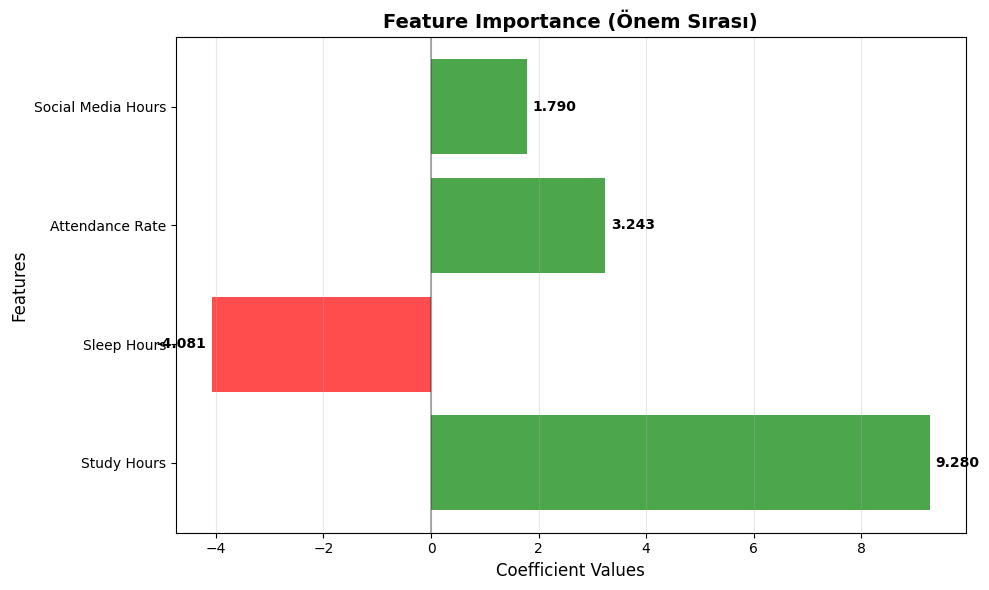

In [ ]:
# Yatay Bar Plot
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in coef_df['Coefficient']]
bars = plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, alpha=0.7)

# Değerleri bar'ların yanına yazdır
for i, (bar, coef) in enumerate(zip(bars, coef_df['Coefficient'])):
    plt.text(bar.get_width() + (0.1 if coef > 0 else -0.1), 
             bar.get_y() + bar.get_height()/2, 
             f'{coef:.3f}', 
             ha='left' if coef > 0 else 'right', 
             va='center', 
             fontweight='bold')

plt.title('Feature Importance (Önem Sırası)', fontsize=14, fontweight='bold')
plt.xlabel('Coefficient Values', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

### Katsayıların Yorumlanması:

**Pozitif Katsayılar (Yeşil)**: Bu özellikler arttıkça exam score da artar
- Study Hours, Sleep Hours, Attendance Rate muhtemelen pozitif olacak

**Negatif Katsayılar (Kırmızı)**: Bu özellikler arttıkça exam score azalır  
- Social Media Hours muhtemelen negatif olacak

**En Büyük Mutlak Değer**: En etkili özellik (en önemli faktör)